In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Marketing Analysis

<img style="margin-left:0" src="https://www.haleymarketing.com/wp-content/uploads/2020/07/graphs-job-laptop-papers-590016-1.jpg" width="600px" />

### Story

We are a marketing analyst team and we've been told by the CMO that recent marketing campaigns have not been as effective as they were expected to be. 

### Goal 🎯

We need to analyze the dataset to understand this problem and propose data-driven solutions.


In [2]:
marketing_df = pd.read_csv('data/marketing_data.csv', parse_dates=['Dt_Customer'])

In [3]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Marketing campaign dataset contains information about:

### Customer Profile

- **Year_Birth**
- **Education**
- **Marital Status**
- **Income** - Yearly Household Income
- **Kidhome** - Number of children in household
- **Teenhome** - Number of teenagers in household
- **Country** - customer location

### Product Preferences

- **Recency** - number of days since customer's last purchase
- **MntWines** - amount spent on wine in the last 2 years
- **MntFruits** - amount spent on fruits in the last 2 years
- **MntMeatProducts** - amount spent on meat in the last 2 years
- **MntFishProducts** - amount spent on fish in the last 2 years
- **MntSweetProducts** - amount spent on sweets in the last 2 years
- **MntGoldProducts** - amount spent on gold in the last 2 years

### Channel Preferences

- **NumDealsPurchases** - number of purchases made with a discount
- **NumWebPurchases** - number of purchases made through the company web site

### Campaign Stats

- **Dt_Customer** - date of customer's enrollment with the company
- **Complain** - flag if customer complained in the last 2 years
- **Response** - flag if customer accepted the offer int the last 2 years
- **AcceptedCmpX** - flag if customer accepted the offer in the X th campaign



# Exploratory Data Analysis 🔎

## Section Goals

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

## Missing Values

Let's get missing value statistic for the dataset:

In [4]:
missing_df = marketing_df.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate(%)'] = (missing_df['missing_count'] / len(marketing_df)) * 100

missing_df

missing_count  missing_rate(%)
Income             24         1.071429

Only one **Income** feature contains missing values: 24 individuals with missing income infomation which is **1%** of all observations:

In [5]:
marketing_df[marketing_df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married    NaN        2         1   
262    1994        1983  Graduation        Married    NaN        1         0   
394    3769        1972         PhD       Together    NaN        1         0   
449    5255        1986  Graduation         Single    NaN        1         0   
525    8268        1961         PhD        Married    NaN        0         1   
590   10629        1973    2n Cycle        Married    NaN        1         0   
899   10475        1970      Master       Together    NaN        0         1   
997    9235        1957  Graduation         Single    NaN        1         1   
1096   4345        1964    2n Cycle         Single    NaN        1         1   
1185   7187        1969      Master       Together    NaN        1         1   
1213   8720        1978    2n Cycle       Together    NaN        0         0   
1312   8557        1982  Graduation         Single    NaN        1         0   
1515   2863        1970  Graduation         Single    NaN        1         2   
1558   2437        1989  Graduation        Married    NaN        0         0   
1693   5250        1943      Master          Widow    NaN        0         0   
1804   7281        1959         PhD         Single    NaN        0         0   
1858   1612        1981         PhD         Single    NaN        1         0   
1863   5079        1971  Graduation        Married    NaN        1         1   
1880  10339        1954      Master       Together    NaN        0         1   
1967   5798        1973      Master       Together    NaN        0         0   
1983   2902        1958  Graduation       Together    NaN        1         1   
2139   3117        1955  Graduation         Single    NaN        0         1   
2165   7244        1951  Graduation         Single    NaN        2         1   
2170   1295        1963  Graduation        Married    NaN        0         1   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
134   2012-11-19        4       230  ...                  8   
262   2013-11-15       11         5  ...                  2   
394   2014-03-02       17        25  ...                  3   
449   2013-02-20       19         5  ...                  0   
525   2013-07-11       23       352  ...                  7   
590   2012-09-14       25        25  ...                  3   
899   2013-04-01       39       187  ...                  6   
997   2014-05-27       45         7  ...                  2   
1096  2014-01-12       49         5  ...                  2   
1185  2013-05-18       52       375  ...                  4   
1213  2012-08-12       53        32  ...                  1   
1312  2013-06-17       57        11  ...                  3   
1515  2013-08-23       67       738  ...                 10   
1558  2013-06-03       69       861  ...                 12   
1693  2013-10-30       75       532  ...                 11   
1804  2013-11-05       80        81  ...                  4   
1858  2013-05-31       82        23  ...                  3   
1863  2013-03-03       82        71  ...                  3   
1880  2013-06-23       83       161  ...                  4   
1967  2013-11-23       87       445  ...                  8   
1983  2012-09-03       87        19  ...                  3   
2139  2013-10-18       95       264  ...                  5   
2165  2014-01-01       96        48  ...                  4   
2170  2013-08-11       96       231  ...                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                   9             0             0             0   
262                   7             0             0             0   
394                   7             0             0             0   
449                   1             0             0             0   
525                   6             0             0             0   
590               

Currently, **Income** feature is in string format as we could see from `info()` output. This is because of `$X,000.00` format. Let's make **Income** a numerical feature to estimate. This will help us during value imputation:

In [6]:
marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')
marketing_df['Income'] = marketing_df['Income'].str.replace(',', '')
marketing_df['Income'] = marketing_df['Income'].astype(float)

<ipython-input-6-98105df49c74>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')


In [7]:
marketing_df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

We can assume that yearly **income** generally depends on **education**. **PhD** fellows would earn more than people with **basic education**. 

**Country** possibly makes a difference, too. People from countries with **developed economy** has more chances to earn more for the work. Also, **education**-level is generally stronger in such a countries. For example, US has world-famouse MIT or Standford universities.

So let's use median incomes for **education** and **country** groups of customers to impute missing **income** values:

In [8]:
marketing_df['Income'] = marketing_df .groupby(['Education', 'Country'])['Income'].transform(lambda x: x.fillna(x.median()))

## Feature Correlations

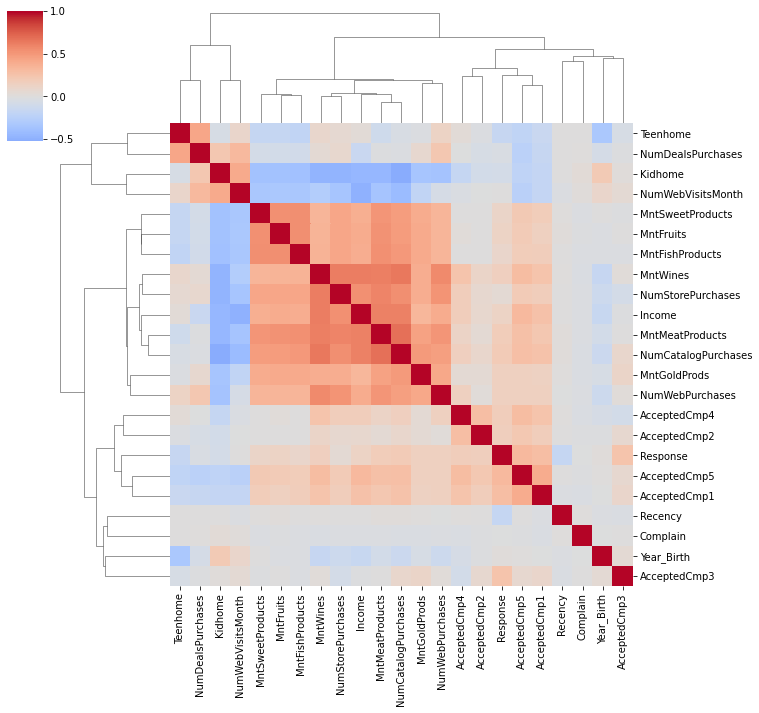

In [9]:
corrs = marketing_df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cmap='coolwarm', center=0, cbar_pos=(-0.05, 0.8, 0.05, 0.18));

### Insights

All features are got clustered by 3 groups:

**Childrens**:
- people with children have a higher number of deal puchases
- number of deal puchases nagatively correlate with income
- amount of purchased products negatively correlates with number of kids

**High Income**
- income correlates with catalog, store and website purchases
- income negatevely correlates with website views
- income correlates with purchase amount, especially, for wine and meat purchases

**Adverticement**
- campaign acceptances correlates with each others
- campaign acceptances correlates with the high income cluster and negatevely correlates with the children cluster

### Anomalies

- Number of website views doesn't correlate with number of purchases that are done through the website
- Number of website purchases correlates with number of deals (deals effectively stimulate purchases on the website)
- amount of sweet purchases don't correlate with the children cluster

## Data Transformation

In [10]:
num_features = [f for f in marketing_df.columns if marketing_df.dtypes[f] == 'int64']
num_features.remove('ID')

cat_features = [f for f in marketing_df.columns if marketing_df.dtypes[f] == 'object']

First step in our data analysis would be overview of feature distributions:

<ipython-input-11-f7b203f8489d>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout();


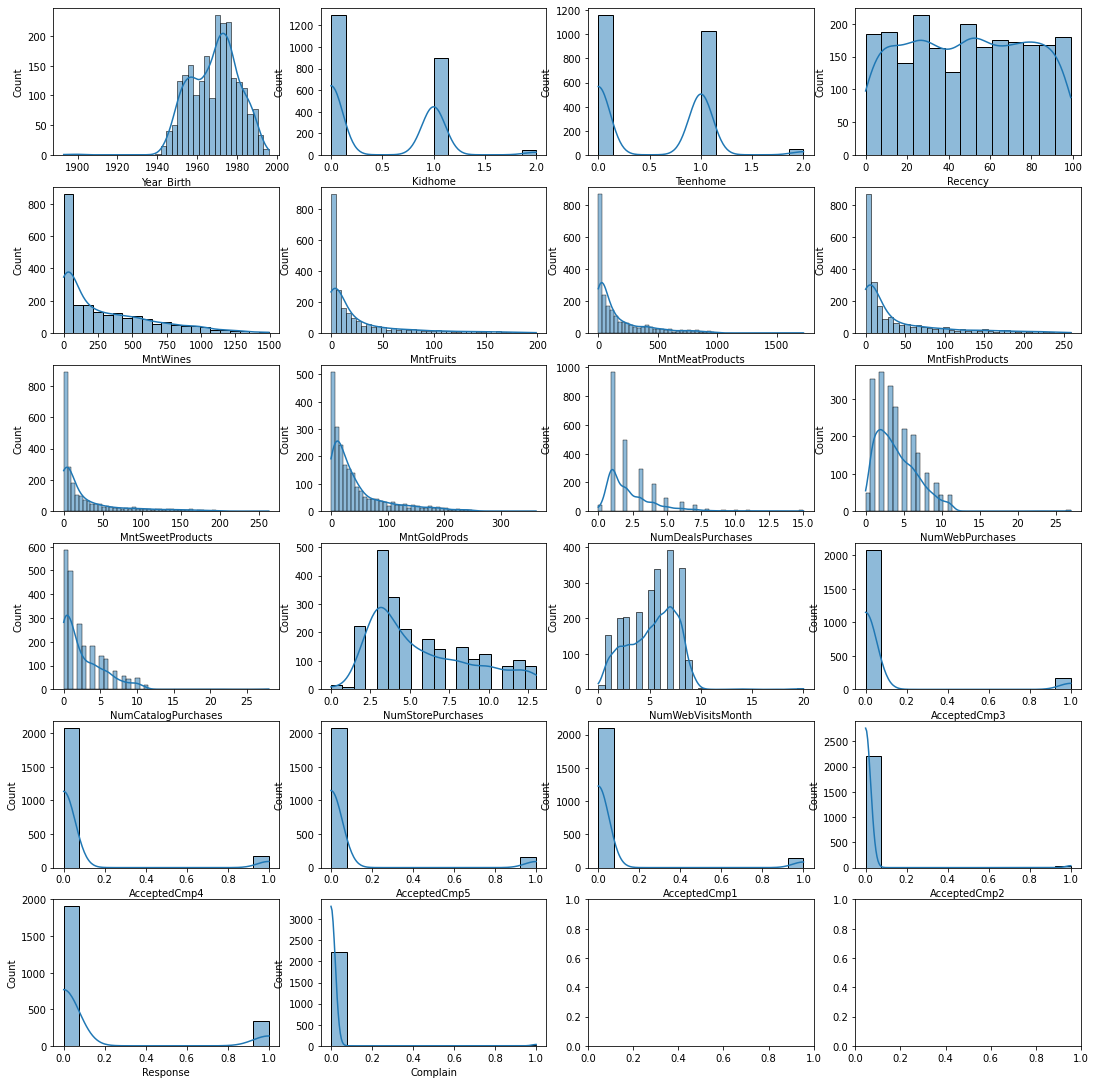

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15),  constrained_layout=True)

fig.tight_layout();

for idx, (feature, ax) in enumerate(zip(num_features, axes.flat)):
    sns.histplot(data=marketing_df, x=feature, kde=True, palette='tab10', ax=ax);

We can notice the following:
- Most of the features are **right skewed** (**Income**, **MntX**, etc)
- **Year_Birth**, **Income**, **NumWebVisitsMonth** are bimodally distributed
- **AcceptCmpX**, **Response**, **Complain** are binomially distributed (thanks to 0/1 they can take)
- **Recency** resambles uniform distribution 
- There are outliers in **Year_Birth** features: left tail of the distribution goes beyond 1900 in the left direction (hard to believe that there were 100+ year-old people that shopped)
- All right skewed features have outliers 

In [12]:
skewness_df = pd.DataFrame({
    'feature': [], 
    'skewness': [], 
    'kurtosis': [], 
    'boxcox_skewness': [], 
    'boxcox_kurtosis': [],
    'log_skewness': [],
    'log_kurtosis': [],
    'sqrt_skewness': [],
    'sqrt_kurtosis': [],
    'boxcox_test': [],
})

transformed_df = marketing_df.copy()

for feature in num_features:
    skewness = transformed_df[feature].skew()
    kurtosis = transformed_df[feature].kurtosis()

    transformed_df[feature + '_transformed'], boxcox_test = stats.boxcox(1 + transformed_df[feature])
    boxcox_skewness = transformed_df[feature + '_transformed'].skew()
    boxcox_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    transformed_df[feature + '_transformed'] = np.log1p(transformed_df[feature])
    log_skewness = transformed_df[feature + '_transformed'].skew()
    log_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    transformed_df[feature + '_transformed'] = np.sqrt(transformed_df[feature])
    sqrt_skewness = transformed_df[feature + '_transformed'].skew()
    sqrt_kurtosis = transformed_df[feature + '_transformed'].kurtosis()

    skewness_df = skewness_df.append({
            'feature': feature, 
            'skewness': skewness, 
            'kurtosis': kurtosis, 
            'boxcox_test': boxcox_test,
            'boxcox_skewness': boxcox_skewness, 
            'boxcox_kurtosis': boxcox_kurtosis,
            'log_skewness': log_skewness, 
            'log_kurtosis': log_kurtosis,
            'sqrt_skewness': sqrt_skewness, 
            'sqrt_kurtosis': sqrt_kurtosis,
        }, 
        ignore_index=True
    )

skewness_df

feature   skewness    kurtosis  boxcox_skewness  \
0            Year_Birth  -0.349944    0.717464        -0.007914   
1               Kidhome   0.635288   -0.779661         0.332297   
2              Teenhome   0.407115   -0.986235         0.125449   
3               Recency  -0.001987   -1.201897        -0.282295   
4              MntWines   1.175771    0.598744        -0.146798   
5             MntFruits   2.102063    4.050976         0.019205   
6       MntMeatProducts   2.083233    5.516724        -0.016788   
7       MntFishProducts   1.919769    3.096461        -0.010966   
8      MntSweetProducts   2.136081    4.376548         0.020291   
9          MntGoldProds   1.886106    3.551709        -0.030453   
10    NumDealsPurchases   2.418569    8.936914        -0.000095   
11      NumWebPurchases   1.382794    5.703128        -0.016079   
12  NumCatalogPurchases   1.880989    8.047437         0.030684   
13    NumStorePurchases   0.702237   -0.622048        -0.006758   
14    NumWebVisitsMonth   0.207926    1.821614        -0.009542   
15         AcceptedCmp3   3.291705    8.843214         3.291705   
16         AcceptedCmp4   3.241574    8.515406         3.241574   
17         AcceptedCmp5   3.291705    8.843214         3.291705   
18         AcceptedCmp1   3.555444   10.650694         3.555444   
19         AcceptedCmp2   8.472093   69.838711         8.472093   
20             Response   1.971555    1.888714         1.971555   
21             Complain  10.188972  101.906135        10.188972   

    boxcox_kurtosis  log_skewness  log_kurtosis  sqrt_skewness  sqrt_kurtosis  \
0         -0.325483     -0.374130      0.831068      -0.361951       0.773214   
1         -1.857231      0.418104     -1.598768       0.363641      -1.769883   
2         -1.873292      0.178684     -1.732310       0.121338      -1.883373   
3         -1.024081     -1.555820      2.371964      -0.631769      -0.437390   
4         -1.236387     -0.547198     -0.842255       0.393512      -1.024110   
5         -1.149458      0.083858     -1.128044       0.968118       0.175508   
6         -1.071366     -0.082692     -1.053591       0.946682       0.095817   
7         -1.087801     -0.052153     -1.089250       0.894395      -0.068961   
8         -1.171860      0.085683     -1.147726       0.975460       0.193373   
9         -0.621569     -0.341428     -0.418920       0.808973       0.104860   
10         0.268721      0.666507      0.354175       0.862813       1.840548   
11        -0.422779     -0.264285     -0.361270       0.007850       0.321926   
12        -1.174894      0.132260     -1.098875       0.164632      -0.698248   
13        -0.443392     -0.141956     -0.136926       0.145900      -0.342409   
14         0.958338     -1.021059      0.612505      -0.719046       0.561060   
15         8.843214      3.291705      8.843214       3.291705       8.843214   
16         8.515406      3.241574      8.515406       3.241574       8.515406   
17         8.843214      3.291705      8.843214       3.291705       8.843214   
18        10.650694      3.555444     10.650694       3.555444      10.650694   
19        69.838711      8.472093     69.838711       8.472093      69.838711   
20         1.888714      1.971555      1.888714       1.971555       1.888714   
21       101.906135     10.188972    101.906135      10.188972     101.906135   

    boxcox_test  
0     18.817723  
1     -1.414093  
2     -0.556995  
3      0.713632  
4      0.189107  
5     -0.031961  
6      0.030120  
7      0.018210  
8     -0.032643  
9      0.113507  
10    -0.487185  
11     0.189567  
12    -0.102409  
13     0.108127  
14     0.864478  
15   -19.825700  
16   -19.350731  
17   -19.825700  
18   -22.441862  
19  -107.721233  
20    -9.592102  
21  -153.887473

- Box-Cox transformation **helped** majority of features to be **more "normal"**, but **not all**
- **AcceptedCmpX, Response, Complain** doesn't transform well (because they are binary)
- Box-Cox transformation doesn't help with **Kidhome, Teenhome, Recency**
- The best shot for **Recency** is sqrt transformation. 
- **Kidhome** and **Teenhome** are similarly distributed in a categorical manner. Let's think how we are going to handle them (?)

In [13]:
boxcox_transform_features = [
    'Year_Birth',
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
]

for feature in boxcox_transform_features:
    marketing_df[feature + '_transformed'], _ = stats.boxcox(1 + marketing_df[feature])

marketing_df['Recency_transformed'] = np.sqrt(marketing_df['Recency'])

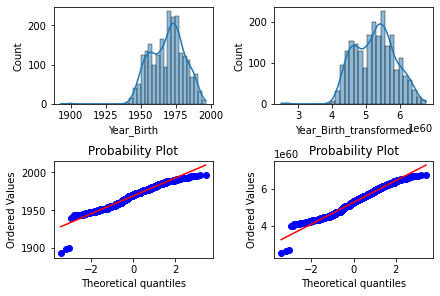

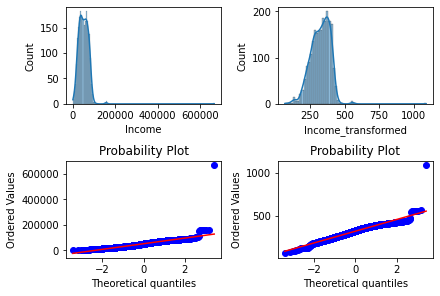

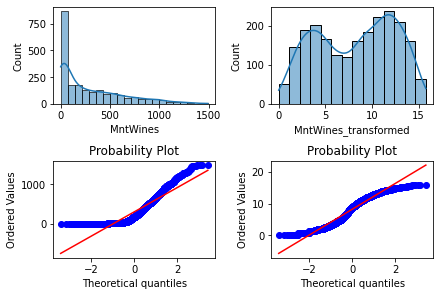

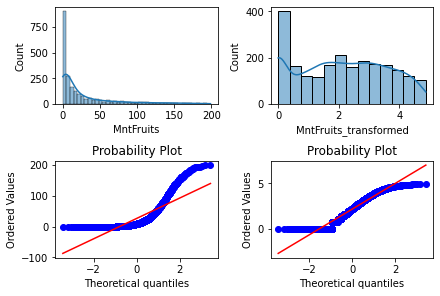

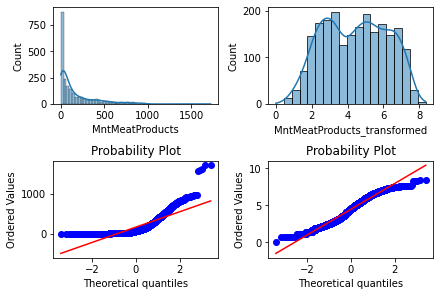

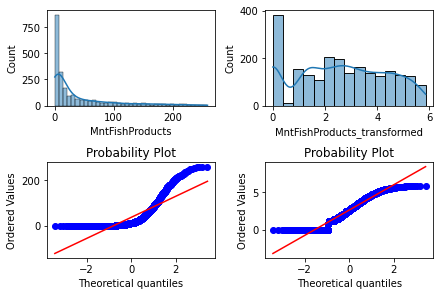

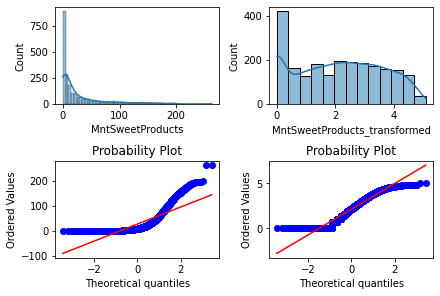

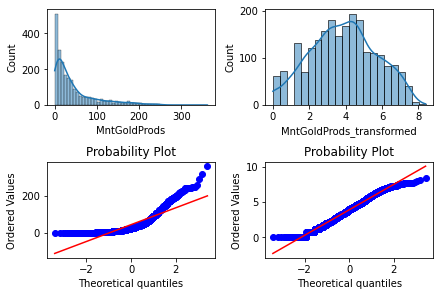

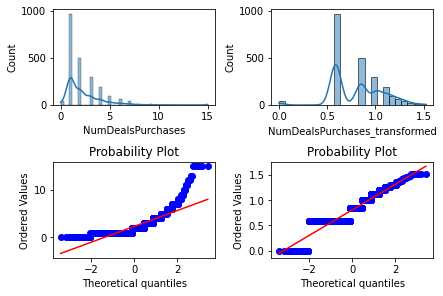

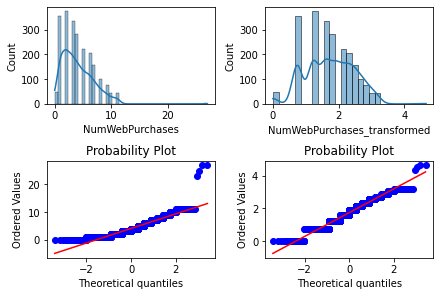

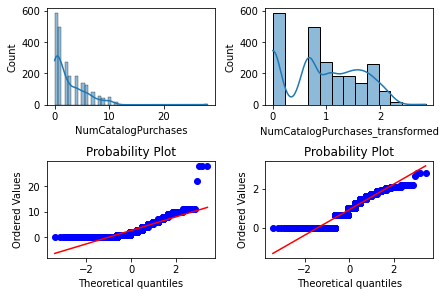

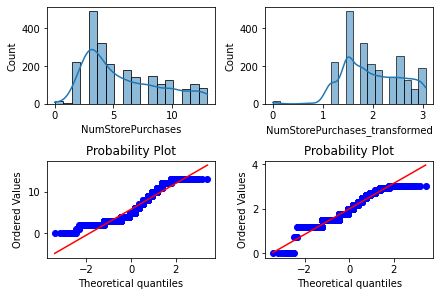

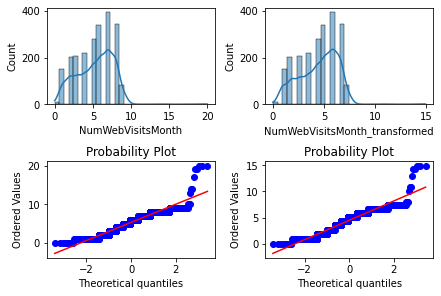

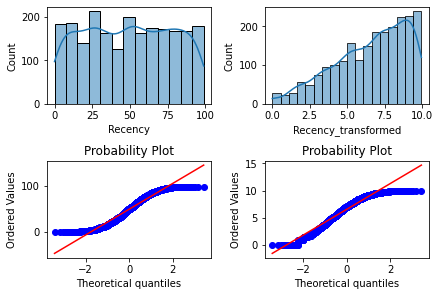

In [14]:
feature_to_check_normality = boxcox_transform_features + ['Recency']

for feature in feature_to_check_normality:
    _, ax = plt.subplots(2, 2, constrained_layout=True)
    
    # show original distribution and its probability-probability plot
    sns.histplot(data=marketing_df, x=feature, kde=True, palette='tab10', ax=ax[0][0])
    stats.probplot(marketing_df[feature], dist=stats.norm, plot=ax[1][0])

    # show transformed distribution and its probability-probability plot 
    sns.histplot(data=marketing_df, x=feature + '_transformed', kde=True, palette='tab10', ax=ax[0][1])
    stats.probplot(marketing_df[feature + '_transformed'], dist=stats.norm, plot=ax[1][1])

- Most of the features did become more **normaly** distributed
- **NumWebVisitsMonth** doesn't seem to transformed **much** (?)
- **Recency** distribution strated to look like **a stair**
- Transformation revealed that **MntX** and **NumXPurchases** features are **multimodal**

## Outliers

<ipython-input-15-888291f2f30e>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


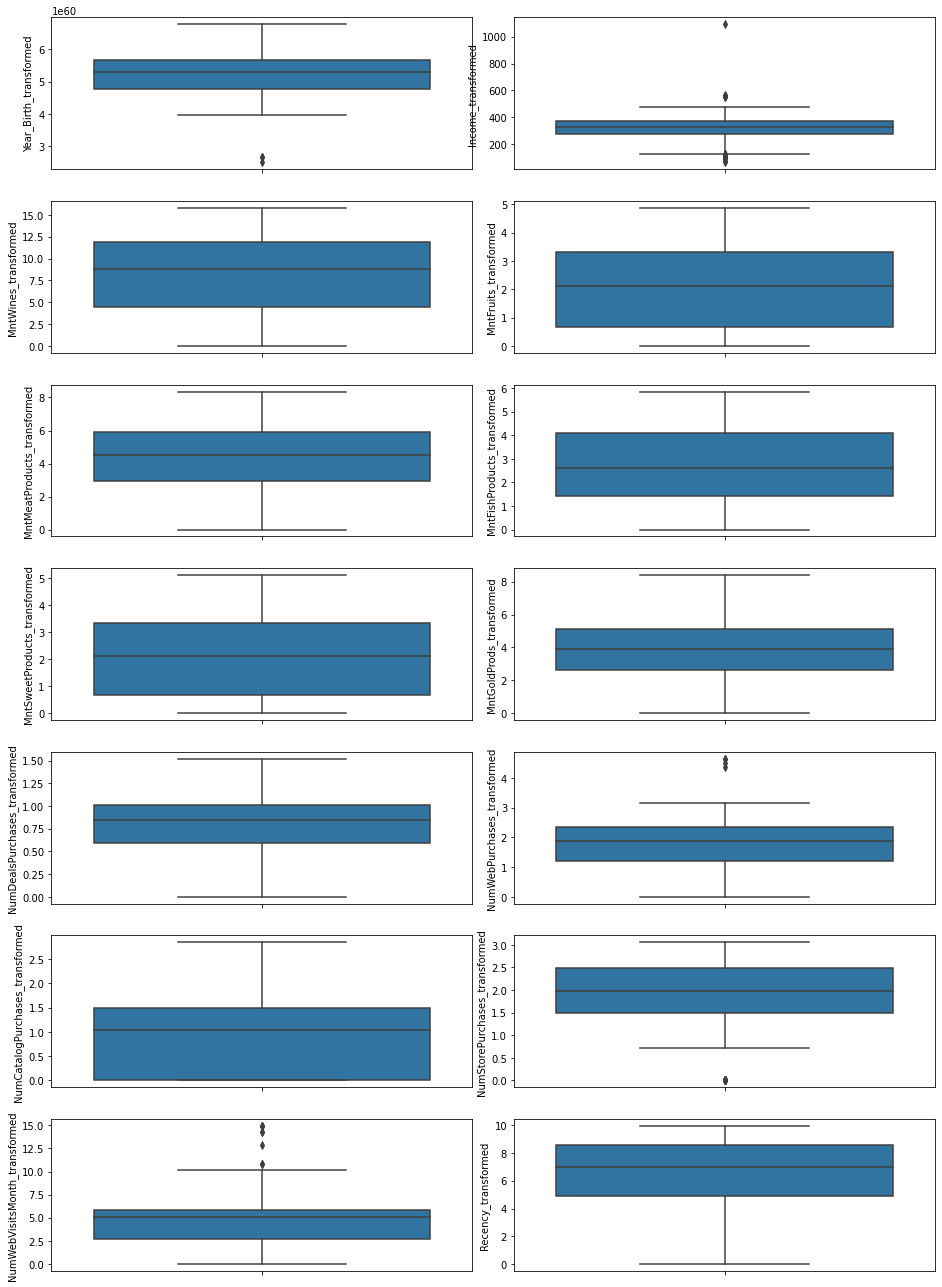

In [15]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(13, 18), constrained_layout=True)
fig.tight_layout()

for idx, (feature, ax) in enumerate(zip(feature_to_check_normality, axes.flat)):
    if feature + '_transformed' in marketing_df:
        feature = feature + '_transformed'

    sns.boxplot(data=marketing_df, y=feature, palette='tab10', ax=ax);

- **Year_Birth**, **Income**, **NumWebVisitMonth**, **NumStorePurchases**, **NumWebPurchases** contains ourliers even after transformation.

In [16]:
marketing_df[marketing_df['Year_Birth_transformed'] > 6][['Year_Birth', 'Year_Birth_transformed']]

Year_Birth  Year_Birth_transformed
0           1970            5.295818e+60
1           1961            4.858817e+60
2           1958            4.720901e+60
3           1967            5.146175e+60
4           1989            6.343605e+60
...          ...                     ...
2235        1976            5.607551e+60
2236        1977            5.661167e+60
2237        1976            5.607551e+60
2238        1978            5.715268e+60
2239        1969            5.245485e+60

[2240 rows x 2 columns]

**Box-Cox transformation made some records super huge 1e60. Need to check why (todo)**

In [17]:
marketing_df[marketing_df['Income_transformed'] > 500]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  \
325          0  2013-04-29       13         1  ...   
497          0  2012-08-04       21        55  ...   
527          0  2013-06-02       23         9  ...   
731          1  2013-06-03       31        85  ...   
853          0  2013-06-04       37        39  ...   
1826         0  2014-02-07       81         1  ...   
1925         0  2013-08-29       85         2  ...   
2204         1  2014-03-01       98        20  ...   

      MntMeatProducts_transformed  MntFishProducts_transformed  \
325                      8.356512                     1.109675   
497                      8.279566                     2.967791   
527                      3.078951                     2.241775   
731                      2.957614                     1.109675   
853                      2.384310                     1.109675   
1826                     0.700433                     0.697540   
1925                     1.116991                     0.697540   
2204                     8.248401                     0.697540   

      MntSweetProducts_transformed  MntGoldProds_transformed  \
325                       0.685364                  0.721144   
497                       1.355396                  1.765822   
527                       0.685364                  2.977363   
731                       0.685364                  1.170049   
853                       0.000000                  2.495491   
1826                      0.685364                  0.721144   
1925                      0.685364                  0.721144   
2204                      1.079147                  0.721144   

      NumDealsPurchases_transformed  NumWebPurchases_transformed  \
325                        0.000000                     0.000000   
497                        1.520896                     0.000000   
527                        1.115525                     1.585513   
731                        0.000000                     0.000000   
853                        0.000000                     0.740748   
1826                       0.000000                     0.000000   
1925                       0.000000                     0.000000   
2204                       1.520896                     0.000000   

      NumCatalogPurchases_transformed  NumStorePurchases_transformed  \
325                          2.848061                       0.000000   
497                          2.848061                       0.719784   
527                          0.669118                       1.495587   
731                          0.000000                       0.719784   
853                          0.000000                       0.719784   
1826                         0.000000                       0.000000   
1925                         0.000000                       0.000000   
2204                         2.681905                       0.000000   

      NumWebVisitsMonth_transformed  Recency_transformed  
325                        0.949337             3.605551  
497                        0.000000             4.582576  
527                        5.063583             4.795832  
731                        0.949337             5.567764  
853                        0.949337             6.082763  
1826                       0.000000             9.000000  
1925             

In [18]:
marketing_df[marketing_df['NumWebVisitsMonth_transformed'] > 11]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
60     4246        1982      Master         Single  6560.0        0         0   
663    9931        1963         PhD        Married  4023.0        1         1   
1416  10749        1991  Graduation         Single  8028.0        0         0   
1466   6862        1971  Graduation       Divorced  1730.0        0         0   
1533   5899        1950         PhD       Together  5648.0        1         1   
1721   4303        1957         PhD       Together  6835.0        0         1   

     Dt_Customer  Recency  MntWines  ...  MntMeatProducts_transformed  \
60    2013-12-12        2        67  ...                     3.464976   
663   2014-06-23       29         5  ...                     0.700433   
1416  2012-09-18       62        73  ...                     4.482548   
1466  2014-05-18       65         1  ...                     1.415644   
1533  2014-03-13       68        28  ...                     2.004066   
1721  2012-12-08       76       107  ...                     2.666630   

      MntFishProducts_transformed  MntSweetProducts_transformed  \
60                       1.633255                      1.355396   
663                      0.697540                      0.685364   
1416                     2.119315                      2.460507   
1466                     0.697540                      0.685364   
1533                     0.697540                      0.685364   
1721                     1.109675                      1.079147   

      MntGoldProds_transformed  NumDealsPurchases_transformed  \
60                    7.772828                       0.000000   
663                   0.721144                       1.520896   
1416                  1.170049                       1.520896   
1466                  0.721144                       1.520896   
1533                  3.076934                       0.588245   
1721                  2.977363                       0.000000   

      NumWebPurchases_transformed  NumCatalogPurchases_transformed  \
60                       0.740748                         0.000000   
663                      0.000000                         0.000000   
1416                     0.000000                         0.669118   
1466                     0.000000                         0.000000   
1533                     0.740748                         0.000000   
1721                     0.000000                         0.000000   

      NumStorePurchases_transformed  NumWebVisitsMonth_transformed  \
60                         0.719784                      12.916721   
663                        0.000000                      14.258751   
1416                       0.000000                      14.258751   
1466                       0.000000                      14.922854   
1533                       0.000000                      14.922854   
1721                       0.719784                      14.922854   

      Recency_transformed  
60               1.414214  
663              5.385165  
1416             7.874008  
1466             8.062258  
1533             8.246211  
1721             8.717798  

[6 rows x 42 columns]

<ipython-input-19-ebef4fb69e61>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


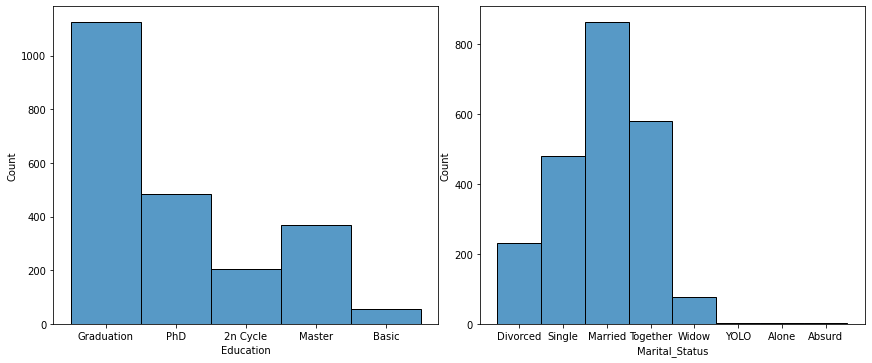

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)
fig.tight_layout()

sns.histplot(data=marketing_df, x='Education', ax=axes[0])
sns.histplot(data=marketing_df, x='Marital_Status', ax=axes[1]);

- **Marital Status** contains outliers: YOLO(3), Alone(2), Absurd(2) are rare values. It's not quite clear how they differ from other options. They maybe related to people mindset and lifestyle, thus they may be connected to **spending patterns**.

In [20]:
marketing_df[marketing_df['Marital_Status'].isin(['YOLO', 'Alone', 'Absurd'])]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
103     492        1973         PhD           YOLO  48432.0        0   
104   11133        1973         PhD           YOLO  48432.0        0   
286      92        1988  Graduation          Alone  34176.0        1   
838    7660        1973         PhD          Alone  35860.0        1   
959     433        1958      Master          Alone  61331.0        1   
1068   4369        1957      Master         Absurd  65487.0        0   
1339   7734        1993  Graduation         Absurd  79244.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  \
103          1  2012-10-18        3       322  ...   
104          1  2012-10-18        3       322  ...   
286          0  2014-05-12       12         5  ...   
838          1  2014-05-19       37        15  ...   
959          1  2013-03-10       42       534  ...   
1068         0  2014-01-10       48       240  ...   
1339         0  2012-12-19       58       471  ...   

      MntMeatProducts_transformed  MntFishProducts_transformed  \
103                      4.174110                     1.633255   
104                      4.174110                     1.633255   
286                      3.380081                     3.078952   
838                      2.271562                     1.633255   
959                      4.105925                     0.000000   
1068                     6.836706                     5.562342   
1339                     5.206273                     5.631735   

      MntSweetProducts_transformed  MntGoldProds_transformed  \
103                       1.355396                  4.691641   
104                       1.355396                  4.691641   
286                       2.591807                  3.636794   
838                       1.079147                  3.636794   
959                       1.740368                  4.655628   
1068                      0.000000                  6.907262   
1339                      3.861204                  7.647525   

      NumDealsPurchases_transformed  NumWebPurchases_transformed  \
103                        1.195171                     2.548900   
104                        1.195171                     2.548900   
286                        1.115525                     1.585513   
838                        0.850732                     0.740748   
959                        1.195171                     3.173996   
1068                       1.007909                     1.585513   
1339                       0.588245                     1.881950   

      NumCatalogPurchases_transformed  NumStorePurchases_transformed  \
103                          0.669118                       2.165772   
104                          0.669118                       2.165772   
286                          0.000000                       1.757968   
838                          0.669118                       1.166527   
959                          0.669118                       2.165772   
1068                         1.636982                       2.165772   
1339                         2.126164                       2.331769   

      NumWebVisitsMonth_transformed  Recency_transformed  
103                        6.573026             1.732051  
104                        6.573026             1.732051  
286                        5.063583             3.464102  
838                        4.287517             6.082763  
959                        6.573026             6.480741  
1068                       1.833479             6.928203  
1339                       0.949337             7.615773  

[7 rows x 42 columns]

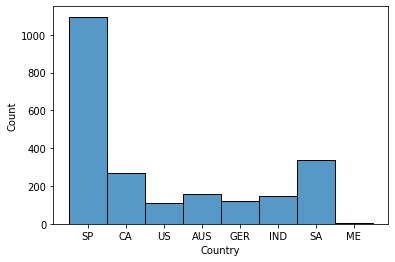

In [21]:
sns.histplot(data=marketing_df, x='Country');

- **Country** contains an outlier: there are only **3 customers** from ME country

In [22]:
marketing_df[marketing_df['Country'] == 'ME']

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
149   9323        1949      Master       Together  49912.0        0         1   
293   5080        1993  Graduation         Single  70515.0        0         0   
1436  2920        1975         PhD         Single  52614.0        0         1   

     Dt_Customer  Recency  MntWines  ...  MntMeatProducts_transformed  \
149   2012-09-07        5       520  ...                     5.877662   
293   2013-10-21       12       420  ...                     6.715437   
1436  2012-12-01       63       789  ...                     5.352961   

      MntFishProducts_transformed  MntSweetProducts_transformed  \
149                      3.610224                      3.672543   
293                      5.464592                      3.902469   
1436                     2.625796                      2.218179   

      MntGoldProds_transformed  NumDealsPurchases_transformed  \
149                   4.691641                       1.115525   
293                   6.639983                       0.588245   
1436                  4.542833                       0.850732   

      NumWebPurchases_transformed  NumCatalogPurchases_transformed  \
149                      3.035774                         1.636982   
293                      2.353334                         1.764283   
1436                     1.221384                         1.483799   

      NumStorePurchases_transformed  NumWebVisitsMonth_transformed  \
149                        2.331769                       6.573026   
293                        1.757968                       1.833479   
1436                       2.480192                       6.573026   

      Recency_transformed  
149              2.236068  
293              3.464102  
1436             7.937254  

[3 rows x 42 columns]

<ipython-input-23-ae9b10126347>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


<AxesSubplot:xlabel='Teenhome', ylabel='Count'>

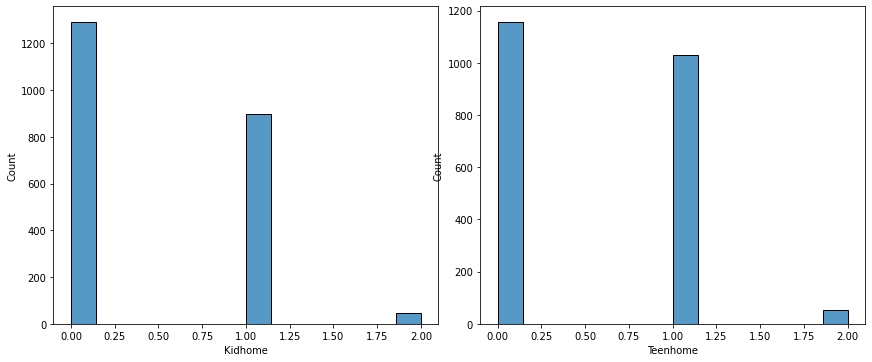

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)
fig.tight_layout()

sns.histplot(data=marketing_df, x='Kidhome', ax=axes[0])
sns.histplot(data=marketing_df, x='Teenhome', ax=axes[1])

## Feature Engineering

- When it comes to grocery purchases, **family size** matters. Bigger families need more food than a single person. We can use **Kidhome**, **Teenhome** and **Martial_Status** to estimate family size:

In [24]:
marketing_df['FamilySize'] = 1 + marketing_df['Kidhome'] + marketing_df['Teenhome'] + (marketing_df['Marital_Status'].isin(['Married', 'Together'])) * 1

- number of children:

In [25]:
marketing_df['NumChildren'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

- **Year_Birth** can be used to estimate the **customer age**. The question is from which year should be substract **Year_Birth**? Checking **Dt_Customer** feature we see that the mentioned 2 years period is 2012-2014. So let's use 2014:

In [26]:
marketing_df['CustomerAge'] = 2014 - marketing_df['Year_Birth']

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Generation_timeline.svg/2880px-Generation_timeline.svg.png" width="600px" />

Besides age, it's popular to divide customers by generations in marketing:

In [27]:
def impute_generation(age):
    if age <= 1900:
        return 'LostGeneration'
    if age >= 1901 and age <= 1927:
        return 'GreatestGeneration'
    if age >= 1928 and age <= 1945:
        return 'SilentGeneration'
    if age >= 1946 and age <= 1964:
        return 'BabyBoomers'
    if age >= 1965 and age <= 1980:
        return 'GenX'
    if age >= 1981 and age <= 1996:
        return 'Millennials'

marketing_df['CustomerGeneration'] = marketing_df['Year_Birth'].apply(impute_generation)

- **Number of times customer accepted campaign** can give a better understanding of active campaign segments that is inclined participate in the future campaigns:

In [28]:
marketing_df['TotalResponses'] = marketing_df[
    [column for column in marketing_df.columns if 'Response' in column]
].sum(axis=1)

- number of purchases:

In [29]:
marketing_df['TotalPurchases'] = marketing_df[
    [column for column in marketing_df.columns if 'Purchases' in column]
].sum(axis=1)

- total amount products bought:

In [30]:
marketing_df['TotalPurchases'] = marketing_df[
    [column for column in marketing_df.columns if 'Mnt' in column]
].sum(axis=1)

# Data Visualization 📊

### Section Goals

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

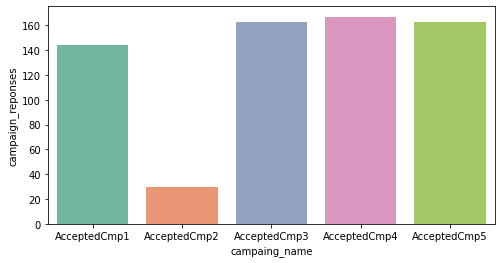

In [31]:
campaign_features = [
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
]

campaign_reponses = [len(marketing_df[marketing_df[campaign] == 1]) for campaign in campaign_features]
campaign_df = pd.DataFrame({
    'campaign_reponses': campaign_reponses,
    'campaing_name': campaign_features,
})

plt.figure(figsize=(8, 4))
sns.barplot(data=campaign_df, x='campaing_name', y='campaign_reponses', palette='Set2');

- **5th campaign** was the most successful
- **3rd and 4th** performed approximately the same and they were very close to **5th campaign**
- **The first campaigns** performed slightly less sucessuful than **3rd, 4th, 5th campaigns** 
- **Second campaign** is significantly underperformed comparing to the other campaigns

# Statistical Analysis 🧮

### Section Goals

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?